First this file will make a direct comparison between biomass, productivity, and abundance at a fixed species diversity.

In [7]:
import numpy as np
import biomass as bm

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.lines as mlines
%matplotlib inline

In [2]:
# Set up ranges and parameters for all plots (from old data)
# Mean values from data are S = 99 E = 1.6e6, N = 1.2e4, B = 3.7e7
# Medians are S = 58.0 E = 1.4e4, N = 700, B = 7.0e4
# Mins are S = 10, E = 1900, N = 136, B = 4300
# Maxs are S = 673, E = 2.4e7, N = 2.4e5, B = 4.6e8

# Set a value to hold N at
nfix = 1000
# And if we want to hold S fixed
sfix = 50
# And for E
efix = 1e5

# Set size of range for n, s, e, when we range over them.
ns = 40
ne = 40
nn = 40

# Now set a range for s. Note that I made it smaller, since min N/S ~ 4
srange = np.linspace(10,250,num=ns)
# Now set a range for E. Range for E/N goes from ~4 to ~3000
erange = np.logspace(np.log10(5000),np.log10(1e7),num=ne)
# Finally set a range for N
nrange = np.logspace(np.log10(250),np.log10(2000),num=nn)

# Now make appropriate mesh grids
S, Es = np.meshgrid(srange,erange)
N, En = np.meshgrid(nrange,erange)
Sn, Ns = np.meshgrid(srange,nrange)

# Biomass contours

In [3]:
# Make biomass contours at fixed S with N and E varying
# Make these contours for 2 values of S, sfix and S = 100
biomass = np.zeros([ne,nn])
biomass_s2 = np.zeros([ne,nn])
biomass_s1 = np.zeros([ne,nn])
s2 = sfix*2
s1 = 10
for i,n in enumerate(nrange):
    for j,e in enumerate(erange):
        biomass[j,i] = bm.biomass({'N':n,'E':e,'S':sfix})
        biomass_s2[j,i] = bm.biomass({'N':n,'E':e,'S':s2})
        biomass_s1[j,i] = bm.biomass({'N':n,'E':e,'S':s1})

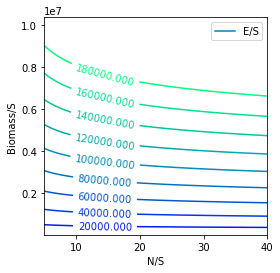

In [4]:
# Plot biomass contours for different values of E/S
fig, ax = plt.subplots(figsize=(4,4))
nlevels = 10
NC = ax.contour(N/sfix,biomass/sfix,En/sfix,levels=nlevels,colors=cm.winter(np.linspace(0,1,nlevels)))
ax.clabel(NC)
ax.set_ylabel('Biomass/S')
ax.set_xlabel('N/S')

# Put legend
# Make proxy artist
proxy = mlines.Line2D([], [], color=cm.winter(0.5),label='E/S')
ax.legend(handles=[proxy])

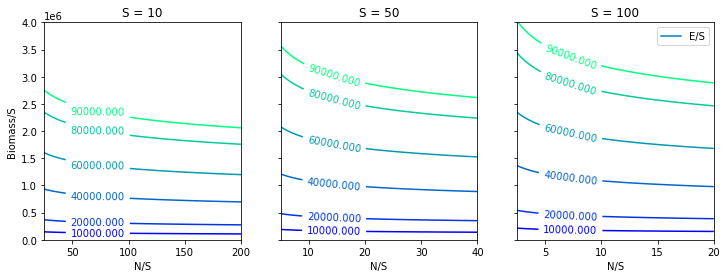

In [5]:
# Plot with three values of S to show how it changes with S
fig, ax = plt.subplots(1,3,figsize=(12,4),sharey=True)
levels = np.array([1e4,2e4,4e4,6e4,8e4,9e4])#,1.2e5,1.4e5,1.6e5,1.8e5])

# First S
NC2 = ax[0].contour(N/s1,biomass_s1/s1,En/s1,levels=levels,colors=cm.winter(np.linspace(0,1,len(levels))))
ax[0].clabel(NC2)
ax[0].set_title('S = {}'.format(s1))
ax[0].set_xlabel('N/S')
ax[0].set_ylabel('Biomass/S')

# Set range
ax[0].set_ylim(0,4e6)

# Second S
NC0 = ax[1].contour(N/sfix,biomass/sfix,En/sfix,levels=levels,colors=cm.winter(np.linspace(0,1,len(levels))))
ax[1].set_title('S = {}'.format(sfix))
ax[1].clabel(NC0)
ax[1].set_xlabel('N/S')

# Third S
NC1 = ax[2].contour(N/s2,biomass_s2/s2,En/s2,levels=levels,colors=cm.winter(np.linspace(0,1,len(levels))))
ax[2].clabel(NC1)
ax[2].set_title('S = {}'.format(s2))
ax[2].set_xlabel('N/S')

# Put legend
# Make proxy artist
proxy = mlines.Line2D([], [], color=cm.winter(0.5),label='E/S')
ax[2].legend(handles=[proxy])

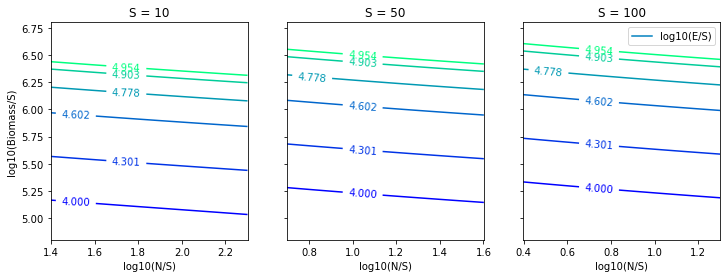

In [12]:
# With log
# Plot with three values of S to show how it changes with S
fig, ax = plt.subplots(1,3,figsize=(12,4),sharey=True)
levels = np.log10(np.array([1e4,2e4,4e4,6e4,8e4,9e4]))#,1.2e5,1.4e5,1.6e5,1.8e5])

# First S
NC2 = ax[0].contour(np.log10(N/s1),np.log10(biomass_s1/s1),np.log10(En/s1),
                    levels=levels,colors=cm.winter(np.linspace(0,1,len(levels))))
ax[0].clabel(NC2)
ax[0].set_title('S = {}'.format(s1))
ax[0].set_xlabel('log10(N/S)')
ax[0].set_ylabel('log10(Biomass/S)')

# Set range
ax[0].set_ylim(4.8,6.8)

# Second S
NC0 = ax[1].contour(np.log10(N/sfix),np.log10(biomass/sfix),np.log10(En/sfix),
                    levels=levels,colors=cm.winter(np.linspace(0,1,len(levels))))
ax[1].set_title('S = {}'.format(sfix))
ax[1].clabel(NC0)
ax[1].set_xlabel('log10(N/S)')

# Third S
NC1 = ax[2].contour(np.log10(N/s2),np.log10(biomass_s2/s2),np.log10(En/s2),
                    levels=levels,colors=cm.winter(np.linspace(0,1,len(levels))))
ax[2].clabel(NC1)
ax[2].set_title('S = {}'.format(s2))
ax[2].set_xlabel('log10(N/S)')

# Put legend
# Make proxy artist
proxy = mlines.Line2D([], [], color=cm.winter(0.5),label='log10(E/S)')
ax[2].legend(handles=[proxy])

## Try with larger S to see

I thought these should be the same but they aren't quite. Why not?

In [70]:
# Try larger s
biomass_s200 = np.zeros([ne,nn])
s200 = 200
for i,n in enumerate(nrange):
    for j,e in enumerate(erange):
        biomass_s200[j,i] = bm.biomass({'N':n,'E':e,'S':s200})

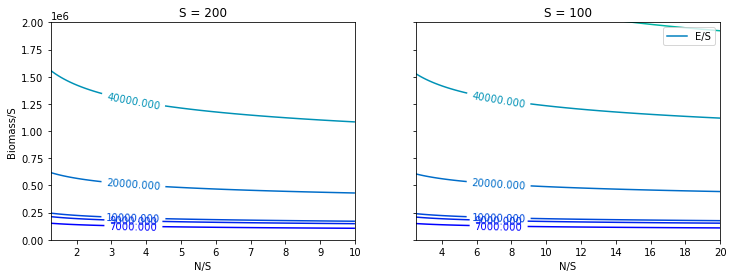

In [73]:
# Plot with three values of S to show how it changes with S
fig, ax = plt.subplots(1,2,figsize=(12,4),sharey=True)
levels = np.array([7e3,9e3,1e4,2e4,4e4,6e4,8e4,9e4])#,1.2e5,1.4e5,1.6e5,1.8e5])

# First S
NC1 = ax[0].contour(N/s200,biomass_s200/s200,En/s200,levels=levels,colors=cm.winter(np.linspace(0,1,len(levels))))
ax[0].clabel(NC1)
ax[0].set_title('S = {}'.format(s200))
ax[0].set_xlabel('N/S')
ax[0].set_ylabel('Biomass/S')

# Set range
ax[0].set_ylim(0,2e6)

# Second S
NC0 = ax[1].contour(N/s2,biomass/s2,En/s2,levels=levels,colors=cm.winter(np.linspace(0,1,len(levels))))
ax[1].set_title('S = {}'.format(s2))
ax[1].clabel(NC0)
ax[1].set_xlabel('N/S')


# Put legend
# Make proxy artist
proxy = mlines.Line2D([], [], color=cm.winter(0.5),label='E/S')
ax[1].legend(handles=[proxy])